##  逻辑回归    
在训练的初始阶段，我们将要构建一个逻辑回归模型来预测，某个学生是否被大学录取。 设想你是大学相关部分的管理者，想通过申请学生两次测试的评分，来决定他们是否被录取。 现在你拥有之前申请学生的可以用于训练逻辑回归的训练样本集。对于每一个训练样本，你有他们两次测试的评分和最后是被录取的结果。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 中文乱码的处理
plt.rcParams['font.sans-serif'] =['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

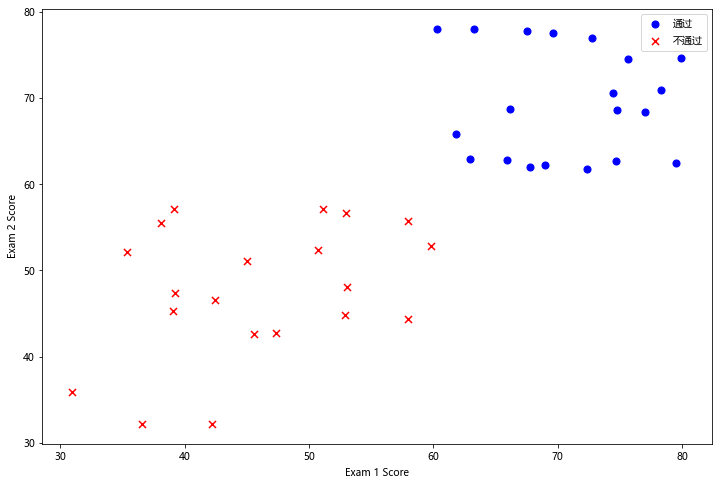

In [32]:
# 创建一些列数据
#随便创建一些列合适的点,然后画图观察
data = pd.DataFrame({'Exam1':np.concatenate((np.random.uniform(30,60,20),np.random.uniform(60,80,20))),'Exam2':np.concatenate((np.random.uniform(30,60,20),np.random.uniform(60,80,20))),'result':np.concatenate((np.zeros(20),np.ones(20)))})
# 作图分类点
positive = data[data['result'].isin([1])]
negative = data[data['result'].isin([0])]
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam1'], positive['Exam2'], s=50, c='b', marker='o', label='通过')
ax.scatter(negative['Exam1'], negative['Exam2'], s=50, c='r', marker='x', label='不通过')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

In [9]:
# sigmoid 函数
def sigmoid(z):
    return 1/(1+np.exp(-z))

代价函数：
$J\left( \theta \right)=-\frac{1}{m}\sum\limits_{i=1}^{m}{[{{y}^{(i)}}\log \left( {h_\theta}\left( {{x}^{(i)}} \right) \right)+\left( 1-{{y}^{(i)}} \right)\log \left( 1-{h_\theta}\left( {{x}^{(i)}} \right) \right)]}$

梯度函数以及推导：

$\frac{\partial }{\partial {\theta_{j}}}J\left( \theta \right)=\frac{\partial }{\partial {\theta_{j}}}[-\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( 1+{{e}^{-{\theta^{T}}{{x}^{(i)}}}} \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1+{{e}^{{\theta^{T}}{{x}^{(i)}}}} \right)]}]$ $=-\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\frac{-x_{j}^{(i)}{{e}^{-{\theta^{T}}{{x}^{(i)}}}}}{1+{{e}^{-{\theta^{T}}{{x}^{(i)}}}}}-\left( 1-{{y}^{(i)}} \right)\frac{x_j^{(i)}{{e}^{{\theta^T}{{x}^{(i)}}}}}{1+{{e}^{{\theta^T}{{x}^{(i)}}}}}}]$ $=-\frac{1}{m}\sum\limits_{i=1}^{m}{{y}^{(i)}}\frac{x_j^{(i)}}{1+{{e}^{{\theta^T}{{x}^{(i)}}}}}-\left( 1-{{y}^{(i)}} \right)\frac{x_j^{(i)}{{e}^{{\theta^T}{{x}^{(i)}}}}}{1+{{e}^{{\theta^T}{{x}^{(i)}}}}}]$ $=-\frac{1}{m}\sum\limits_{i=1}^{m}{\frac{{{y}^{(i)}}x_j^{(i)}-x_j^{(i)}{{e}^{{\theta^T}{{x}^{(i)}}}}+{{y}^{(i)}}x_j^{(i)}{{e}^{{\theta^T}{{x}^{(i)}}}}}{1+{{e}^{{\theta^T}{{x}^{(i)}}}}}}$ $=-\frac{1}{m}\sum\limits_{i=1}^{m}{\frac{{{y}^{(i)}}\left( 1\text{+}{{e}^{{\theta^T}{{x}^{(i)}}}} \right)-{{e}^{{\theta^T}{{x}^{(i)}}}}}{1+{{e}^{{\theta^T}{{x}^{(i)}}}}}x_j^{(i)}}$ $=-\frac{1}{m}\sum\limits_{i=1}^{m}{({{y}^{(i)}}-\frac{{{e}^{{\theta^T}{{x}^{(i)}}}}}{1+{{e}^{{\theta^T}{{x}^{(i)}}}}})x_j^{(i)}}$ $=-\frac{1}{m}\sum\limits_{i=1}^{m}{({{y}^{(i)}}-\frac{1}{1+{{e}^{-{\theta^T}{{x}^{(i)}}}}})x_j^{(i)}}$ $=-\frac{1}{m}\sum\limits_{i=1}^{m}{[{{y}^{(i)}}-{h_\theta}\left( {{x}^{(i)}} \right)]x_j^{(i)}}$ $=\frac{1}{m}\sum\limits_{i=1}^{m}{[{h_\theta}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_j^{(i)}}$

In [88]:
# 代价函数和梯段下降函数
def cost(theta,X,y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(y,np.log(sigmoid(X*theta.T)))
    second = np.multiply((1-y),np.log(1-sigmoid(X*theta.T)))
    return -np.sum(first+second)/len(X)

${\theta_j}:={\theta_j}-\alpha \frac{1}{m}\sum\limits_{i=1}^{m}{({h_\theta}({{x}^{(i)}})-{{y}^{(i)}}){{x}_{j}}^{(i)}}$来同时更新所有$\theta $的值。

In [110]:
# 梯度下降函数，和第一种自定义学习率和循环次数
def gradientSelf(theta,X,y,alpha,num):
    X = np.matrix(X)
    y = np.matrix(y)
    tc = int(theta.ravel().shape[1])
    for i in range(num):
        dist = sigmoid(X*theta.T) - y
        for j in range(tc):
            term = np.multiply(dist,X[:,j])
            theta[0,j] = theta[0,j] - (alpha/len(X)) * np.sum(term)
    return theta

In [93]:
## 单纯梯度下降函数(无学习率，也无需更新theta,相当于循环一次返回)，为第三方算法调用
def gradient(theta,X,y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    tc = int(theta.ravel().shape[1])
    grad = np.zeros(tc)
    dist = sigmoid(X*theta.T) - y
    for j in range(tc):
        term = np.multiply(dist,X[:,j])
        grad[j] = np.sum(term)/ len(X)
    return grad

In [37]:
# 执行测试
# 加一列常数列
data.insert(0, 'Ones', 1)

# 初始化X，y，θ
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
# 转换X，y的类型
X = np.array(X.values)
y = np.array(y.values)

[[-0.95604786  0.50808839 -0.09931169]]


In [118]:
theta = np.matrix(np.zeros(3))
selfpredict=gradientSelf(theta,X,y,0.05,100000)
print(selfpredict)

[[-133.85163041    1.1383581     1.09589532]]


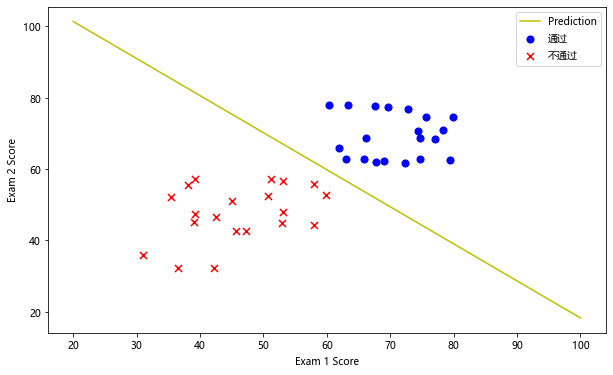

In [119]:
# 作图查看 两个变量时，分割线 sigma(z)=1/2 => -z=0 => x*θ.T = 0  => x2 = （-θ0 - θ1x1)/θ2
# thetaR = np.array([-130.02753949,    0.767743  ,    1.38019249])
thetaR = np.array([-133.85163041   , 1.1383581 ,    1.09589532])

predict = sigmoid(X*thetaR.T)
fig, ax = plt.subplots(figsize=(10,6))
plotting_x1 = np.linspace(20,100, 100)
plotting_h1 = ( - thetaR[0] - thetaR[1] * plotting_x1) / thetaR[2]

ax.plot(plotting_x1, plotting_h1, 'y', label='Prediction')
ax.scatter(positive['Exam1'], positive['Exam2'], s=50, c='b', marker='o', label='通过')
ax.scatter(negative['Exam1'], negative['Exam2'], s=50, c='r', marker='x', label='不通过')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()
plt.show()

In [89]:
#
import scipy.optimize as opt
theta = theta = np.matrix(np.zeros(3))
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
result
# 带入上面的图

(array([-130.02753949,    0.767743  ,    1.38019249]), 89, 4)

## 评价逻辑回归模型


In [122]:
# 定义预测函数
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

# 统计预测正确率
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) / len(correct))
print ('accuracy = {0}%'.format(accuracy*100))


accuracy = 100.0%


## 正则化逻辑回归


In [128]:
data_init = pd.read_csv('../data/weekRegData.txt', header=None, names=['x1', 'x2', 'Accepted'])
data_init.head()

,x1,x2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


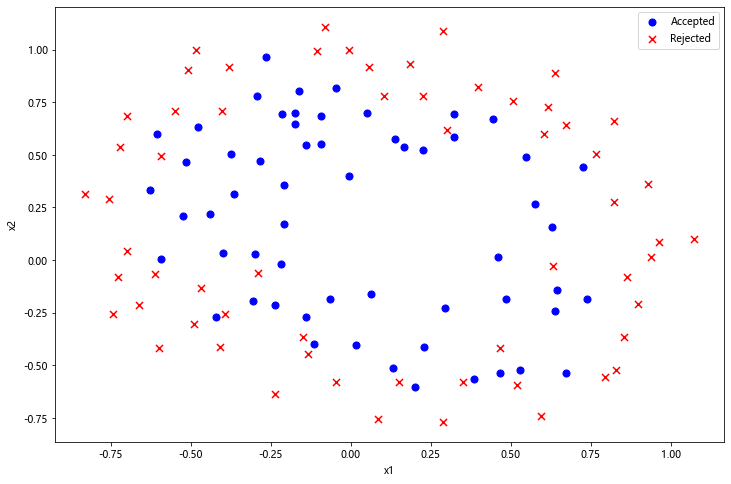

In [129]:
positive2 = data_init[data_init['Accepted'].isin([1])]
negative2 = data_init[data_init['Accepted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive2['x1'], positive2['x2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative2['x1'], negative2['x2'], s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('x1')
ax.set_ylabel('x2')
plt.show()

这个数据集不能像之前一样使用直线将两部分分割。而逻辑回归只适用于线性的分割，所以，这个数据集不适合直接使用逻辑回归。就以多项式理解， 
x
  的次数越高，拟合的越好，但相应的预测的能力就可能变差。

对于线性回归的求解，我们之前推导了两种学习算法：一种基于梯度下降，一种基于正规方程。

正则化线性回归的代价函数为：

$J\left( \theta \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{[({{({h_\theta}({{x}^{(i)}})-{{y}^{(i)}})}^{2}}+\lambda \sum\limits_{j=1}^{n}{\theta _{j}^{2}})]}$

如果我们要使用梯度下降法令这个代价函数最小化，因为我们未对$\theta_0​$进行正则化，所以梯度下降算法将分两种情形：

$Repeat$ $until$ $convergence${

​ ${\theta_0}:={\theta_0}-a\frac{1}{m}\sum\limits_{i=1}^{m}{(({h_\theta}({{x}^{(i)}})-{{y}^{(i)}})x_{0}^{(i)}})$

​ ${\theta_j}:={\theta_j}-a[\frac{1}{m}\sum\limits_{i=1}^{m}{(({h_\theta}({{x}^{(i)}})-{{y}^{(i)}})x_{j}^{\left( i \right)}}+\frac{\lambda }{m}{\theta_j}]$

​ $for$ $j=1,2,...n$

​ }

对上面的算法中$ j=1,2,...,n$ 时的更新式子进行调整可得：

In [196]:
# 实现正则化的代价函数
def costReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (learningRate / (2 * len(X))) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(first - second) / len(X) + reg

In [135]:
# 一种更好的使用数据集的方式是为每组数据创造更多的特征。所以我们为每组x1 x2添加了最高到6次幂的特征
degree = 6
data2 = data_init
x1 = data2['x1']
x2 = data2['x2']
data2.insert(0, 'Ones', 1)
for i in range(2,degree+1):
    tmp = i*2
    data2.insert(tmp-1,'x1'+str(i),np.power(x1,i))
    data2.insert(tmp,'x2'+str(i),np.power(x2,i))
data2.head()

,Ones,x1,x2,x12,x22,x13,x23,x14,x24,x15,x25,x16,x26,Accepted
0,1,0.051267,0.69956,0.002628,0.489384,0.000135,0.342354,0.000007,0.239497,3.541519e-07,0.167542,1.815630e-08,0.117206,1
1,1,-0.092742,0.68494,0.008601,0.469143,-0.000798,0.321335,0.000074,0.220095,-6.860919e-06,0.150752,6.362953e-07,0.103256,1
2,1,-0.213710,0.69225,0.045672,0.479210,-0.009761,0.331733,0.002086,0.229642,-4.457837e-04,0.158970,9.526844e-05,0.110047,1
3,1,-0.375000,0.50219,0.140625,0.252195,-0.052734,0.126650,0.019775,0.063602,-7.415771e-03,0.031940,2.780914e-03,0.016040,1
4,1,-0.513250,0.46564,0.263426,0.216821,-0.135203,0.100960,0.069393,0.047011,-3.561597e-02,0.021890,1.827990e-02,0.010193,1


In [148]:
#  正则后代价函数
def gradientRegSelf(theta,X,y,alpha,num,learningRate ):
    X = np.matrix(X)
    y = np.matrix(y)
    tc = int(theta.ravel().shape[1])
    for i in range(num):
        dist = sigmoid(X*theta.T) - y
        for j in range(tc):
            term = np.multiply(dist,X[:,j]) 
            if j==0:
                theta[0,j] = theta[0,j] - (alpha/len(X)) * np.sum(term)
            else:
                theta[0,j] = theta[0,j] * (1-alpha*learningRate/len(X))- (alpha/len(X)) * np.sum(term)
    return theta

In [186]:
def gradientReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    error = sigmoid(X * theta.T) - y
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((learningRate / len(X)) * theta[:,i])
    return grad

In [149]:
cols = data2.shape[1]
X1 = data2.iloc[:,0:cols-1]
y1 = data2.iloc[:,cols-1:cols]
# 转换X，y的类型
X1 = np.array(X1.values)
y1 = np.array(y1.values)
theta = np.matrix(np.zeros(13))
# 调用梯度下降方法计算
selfpredict=gradientRegSelf(theta,X1,y1,0.05,100000,40)
print(selfpredict)

[[ 0.0895506  -0.03333885  0.02295319 -0.13245361 -0.08897617 -0.03900917
  -0.04814574 -0.10310981 -0.09467924 -0.0465955  -0.07054792 -0.08022341
  -0.09307719]]


In [217]:
#用工具库求解参数
import scipy.optimize as opt
theta = np.matrix(np.zeros(13))
learnRate=1
result2 = opt.fmin_tnc(func=costReg, x0=theta, fprime=gradientReg, args=(X1, y1,learnRate))
result2

(array([ 1.25462168,  0.38544275,  0.98698836, -2.05527228, -1.38893362,
         0.11638269, -0.21312394, -1.45072778, -1.13298213, -0.20722038,
        -0.42387879, -1.01661821, -0.85607168]),
 28,
 1)

In [195]:
# 预测
theta_min = np.matrix(result2[0])
predictions = predict(theta_min, X1)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y1)]
accuracy = (sum(map(int, correct)) / len(correct))
print ('accuracy = {0}%'.format(accuracy*100))

accuracy = 64.40677966101694%


In [219]:
#  画出决策的曲线 计算Z = X*θ.T
def funcZ(theta, x1, x2):
    temp = theta[0]
    place = 0
    for i in range(1, degree+1):
        temp += np.multiply(np.power(x1,i),theta[2*i -1 ]) + np.multiply(np.power(x2,i),theta[2*i])
    return temp
# 边界
# 这里为了避免计算整理二元多项式，x0+a*x1^2+b*x2^2+c*x1^3...=0
# X*θ.T=z  其中边界值z=0即可，这里通过取大量点，然后满足z近似为0 的x1 x2 的一系列的点构成即可
def find_decision_boundary(theta):
    # 选定合适范围，选取大量的点后在筛选
    t1 = np.linspace(-1, 1.5, 1000)
    t2 = np.linspace(-1, 1.5, 1000)                                              
    cordinates = [(x, y) for x in t1 for y in t2]
    x_cord, y_cord = zip(*cordinates)
    h_val = pd.DataFrame({'x1':x_cord, 'x2':y_cord})
    h_val['hval'] = funcZ(theta, h_val['x1'], h_val['x2'])
    decision = h_val[np.abs(h_val['hval']) <  10**-3]
    return decision.x1, decision.x2

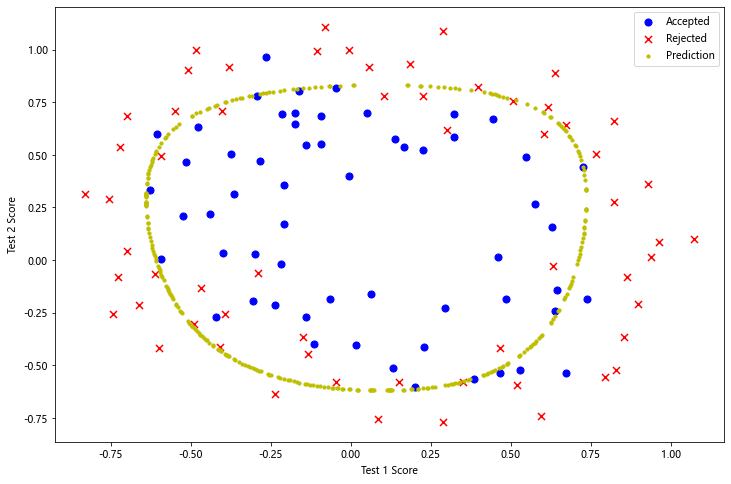

In [222]:
# 这里的学习率取1，可以调整，分别查看learnRate=0 和100 是的过拟合和欠拟合
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive2['x1'], positive2['x2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative2['x1'], negative2['x2'], s=50, c='r', marker='x', label='Rejected')
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')

x, y = find_decision_boundary(result2[0])
plt.scatter(x, y, c='y', s=10, label='Prediction')
# ax.plot(x, y, 'y', label='Prediction')
ax.legend()
plt.show()